# Task 1 : Exploratory Data Analysis (EDA) on Retail Sales Dataset
Name: Adreeja Biswas

## Project Overview:
In this project, I analyzed a dataset containing information about retail sales. The main objective was to conduct exploratory data analysis (EDA) to discover patterns, trends, and insights. The ultimate goal is to provide valuable information that can assist the retail business in making well-informed decisions for business.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white", palette=None,rc={'figure.figsize':(11.7,8.27)})
import warnings
warnings.filterwarnings('ignore')

# **IMPORTING THE DATASET**

In [2]:
retail=pd.read_csv('/kaggle/input/retail-sales-data/Retail Sales Dataset.csv') #importing the dataset

In [3]:
retail

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,24-11-2023,CUST001,Male,34,Beauty,3,50,150
1,2,27-02-2023,CUST002,Female,26,Clothing,2,500,1000
2,3,13-01-2023,CUST003,Male,50,Electronics,1,30,30
3,4,21-05-2023,CUST004,Male,37,Clothing,1,500,500
4,5,06-05-2023,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,16-05-2023,CUST996,Male,62,Clothing,1,50,50
996,997,17-11-2023,CUST997,Male,52,Beauty,3,30,90
997,998,29-10-2023,CUST998,Female,23,Beauty,4,25,100
998,999,05-12-2023,CUST999,Female,36,Electronics,3,50,150


# **DATA CLEANING**

In [4]:
print("Dimension of the dataset:", retail.shape)
print("Size of the dataset: ", retail.size)
print("Columns in the dataset: ", retail.keys())

Dimension of the dataset: (1000, 9)
Size of the dataset:  9000
Columns in the dataset:  Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


In [5]:
print("Information of the dataset: \n",retail.info())
print("After removing duplicates: \n",retail.drop_duplicates(inplace=True)) #cleaning the data by checking the duplicates
print("Size of the dataset after removing duplicates: \n",retail.size)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
Information of the dataset: 
 None
After removing duplicates: 
 None
Size of the dataset after removing duplicates: 
 9000


This dataset contains 9 columns and in that 3 categorical,one is date time and 5 numerical correspond to:

1. Transaction ID: A unique identifier for each transaction, allowing tracking and refernce.
2. Date: The date when the transaction occured, providing insight into sales trends overtime.
3. Customer ID: A unique identifier for each customer, enablling customer-centric analysis.
4. Gender: The gender of the customer Male and Female, offering insights into gender-based purchasing patterns.
5. Age: The gender of the customer, facillilating segmentation and exploration of age-related influences.
6. Product Category: The category of the purchase product (e.g. Electronics, Clothing and Beauty), helping understand product prefernces.
7. Quantity: The number of units of the product, contributing to insights on purchase volumes.
8. Price per Unit: The price of the Unit of the products, aiding in calculations related to total spending.
9. Total Amount: The total monetary value of the transaction showcasing the financial impact of each purchase.

# **DESCRIPTIVE STATISTICS**

In [6]:
retail.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [7]:
print(retail[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].mode())

   Age  Quantity  Price per Unit  Total Amount
0   43       4.0            50.0          50.0
1   64       NaN             NaN           NaN


* The mean age of people visiting the shop is 41 and 75% of the customers are 53 years or below. The median of the age is 42.
* The mode for age is 43,64. The mode for Quantity is 4, price per unit is 50, and total amount is 50.

In [8]:
# Calculate various statistics on the 'Age' column grouped by 'Gender'
retail[['Gender', 'Age']]\
.groupby('Gender')['Age']\
.agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'count'])

,sum,mean,min,max,median,std,count
Gender,,,,,,,
Female,21092,41.356863,18,64,42.0,13.568067,510
Male,20300,41.428571,18,64,42.0,13.812208,490


In [9]:
# Filter the data to get rows where Price per Unit and Quantity are at their maximum values
filtered_data = retail[
    (retail["Price per Unit"] == retail["Price per Unit"].max()) & 
    (retail["Quantity"] == retail["Quantity"].max())
].reset_index(drop=True)

# Convert the 'Date' column to datetime if it's not already
filtered_data['Date'] = pd.to_datetime(filtered_data['Date'])

# Add the 'Month' column with month names (like January, February, etc.)
filtered_data['Month'] = filtered_data['Date'].dt.strftime('%B')

# Sort by 'Date' for clarity
filtered_data = filtered_data.sort_values(by='Date').reset_index(drop=True)

# Display the entire DataFrame as a single table containing all columns
print(filtered_data.to_string(index=False))

 Transaction ID       Date Customer ID Gender  Age Product Category  Quantity  Price per Unit  Total Amount     Month
             15 2023-01-16     CUST015 Female   42      Electronics         4             500          2000   January
            743 2023-01-16     CUST743 Female   34           Beauty         4             500          2000   January
            742 2023-01-21     CUST742 Female   38      Electronics         4             500          2000   January
            420 2023-01-23     CUST420 Female   22         Clothing         4             500          2000   January
            592 2023-01-24     CUST592 Female   46           Beauty         4             500          2000   January
            269 2023-02-01     CUST269   Male   25         Clothing         4             500          2000  February
            577 2023-02-13     CUST577   Male   21           Beauty         4             500          2000  February
            416 2023-02-17     CUST416   Male   53      

The data shows the rows where the Price per Unit and Quantity are at their maximum values. These rows represent the most expensive product(s) with the highest quantity sold.

In [10]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    49 non-null     int64         
 1   Date              49 non-null     datetime64[ns]
 2   Customer ID       49 non-null     object        
 3   Gender            49 non-null     object        
 4   Age               49 non-null     int64         
 5   Product Category  49 non-null     object        
 6   Quantity          49 non-null     int64         
 7   Price per Unit    49 non-null     int64         
 8   Total Amount      49 non-null     int64         
 9   Month             49 non-null     object        
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 4.0+ KB


# **TIME SERIES ANALYSIS**

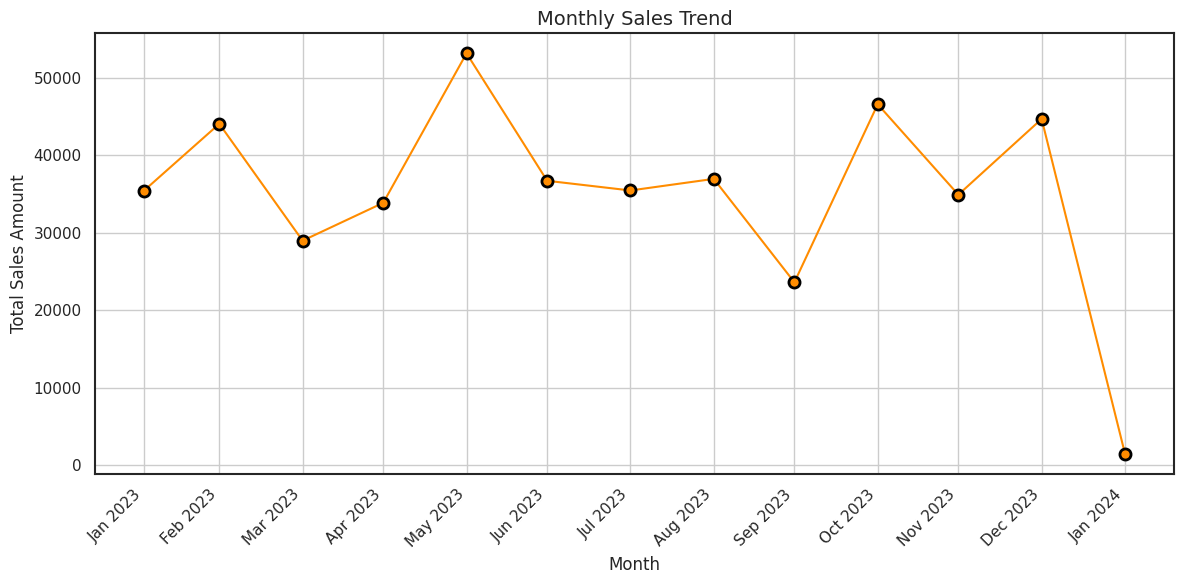

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime and resample monthly sales
retail['Date'] = pd.to_datetime(retail['Date'])
monthly_sales = retail.resample('M', on='Date')['Total Amount'].sum()

# Plot with line color and marker edge customization
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='darkorange', linestyle='-', 
         markersize=8, markeredgecolor='black', markeredgewidth=2)

# Set labels, title, and formatted x-ticks
plt.title('Monthly Sales Trend', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales Amount', fontsize=12)
plt.xticks(monthly_sales.index, monthly_sales.index.strftime('%b %Y'), rotation=45, ha='right')

# Customize chart outline and grid
ax = plt.gca()  # Get current axis
for spine in ax.spines.values():  # Iterate over all spines (borders)
    spine.set_linewidth(1.5)  # Set the border width to 1.5

plt.grid(True)
plt.tight_layout()
plt.show()

The plot shows the total sales amount for each month of year 2023 as a time series.
You can observe how the sales vary from month to month, indicating periods of growth or decline.

**Identifying Patterns:**
Upward/Downward Trends: If the line generally increases over time, you have an upward trend in sales. If it decreases, it signals a downward trend.
As in this case, there was a significant slump in total sales in the month of September of 2023, while there was a significant rise in sales in the month of May of 2023

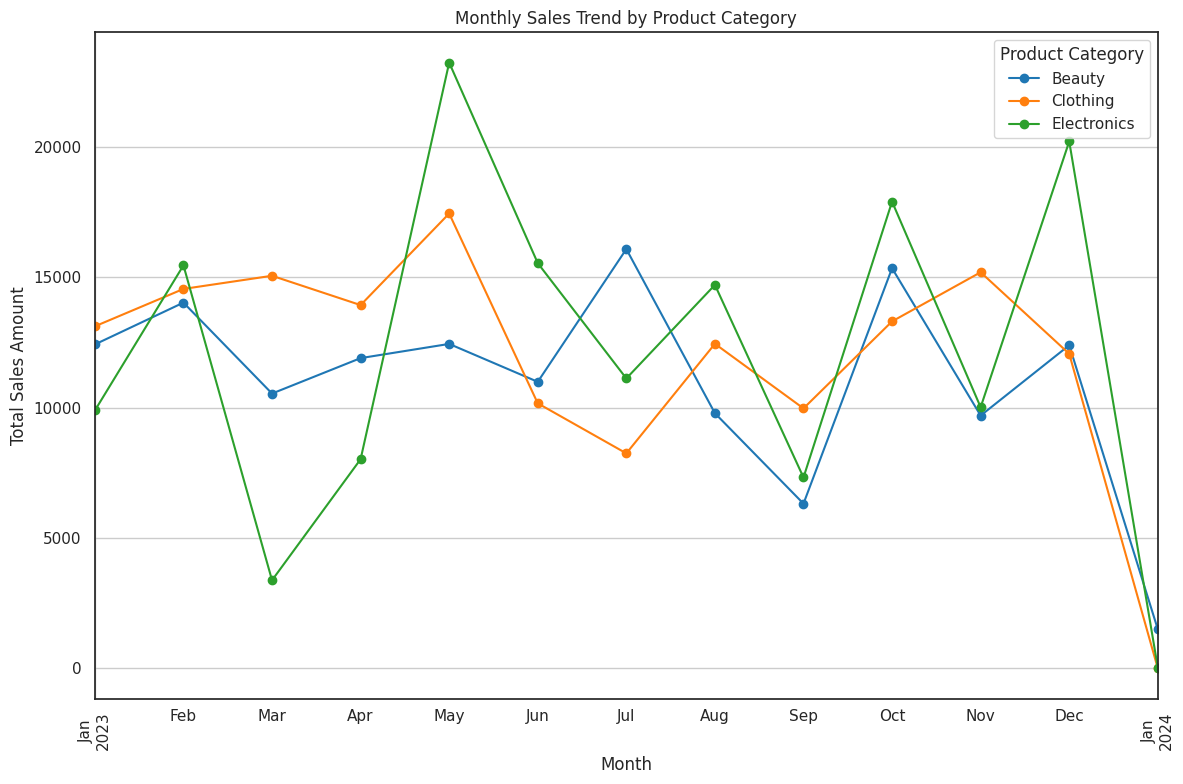

In [12]:
# Group by month and product category, then pivot the data
monthly_category_sales = retail.groupby([retail['Date'].dt.to_period('M'), 'Product Category'])['Total Amount'].sum().unstack(fill_value=0)

# Plot each product category
plt.figure(figsize=(12, 8))
monthly_category_sales.plot(marker='o', ax=plt.gca())

# Set title, labels, and legend
plt.title('Monthly Sales Trend by Product Category')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend(title='Product Category')

plt.tight_layout()
plt.show()

Here, we can see the total sales amount generated per month by the product categories. 

OBSERVATIONS: 
* In the month of March of 2023, there was a dip in sales of Electronics, which then increased in the month of May 2023, and that was the year's highest sale for Electronics. Likewise, for Clothing, it reached its peak in the month of May 2023 but then dipped in the month of July 2023 and so on.
* In May,sales of Electronics and Clothing peaked and Beauty sales remained moderate.
* We can make one observation, that is in the month of May 2023, two of three product categories fared well and generated a high sales amount, while in the month of September 2023, all the three categories did not generate high sales amount with Beauty product sales reaching its lowest, which suggests that something might have occurred in that particular month owing to low product sales.

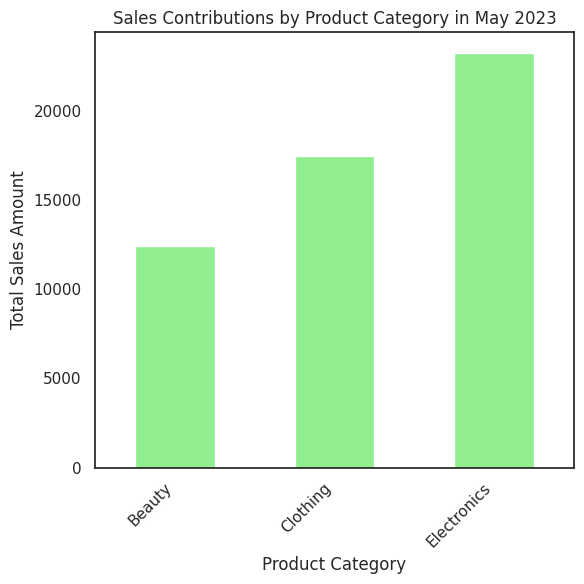

The total sales in the month of May is: 53150


In [13]:
# Filter data for May 2023
data_may = retail[retail['Date'].between('2023-05-01', '2023-05-31')]

# Calculate sales contributions by product category
category_sales_may = data_may.groupby('Product Category')['Total Amount'].sum()

# Plot sales contributions
category_sales_may.plot(kind='bar', figsize=(6, 6), color='lightgreen')
plt.title('Sales Contributions by Product Category in May 2023')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
# Ensure layout fits well
plt.tight_layout()
plt.show()

# Calculate and print total sales in May
total_sales_may = category_sales_may.sum()
print(f'The total sales in the month of May is: {total_sales_may}')

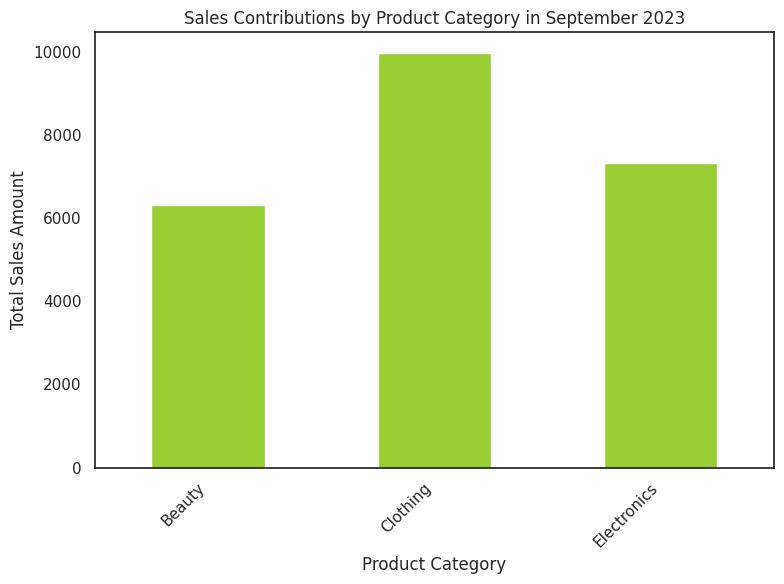

The total sales in the month of September is: 23620


In [14]:
# Filter data for September 2023
data_sept = retail[retail['Date'].between('2023-09-01', '2023-09-30')]

# Calculate sales contributions by product category
category_sales_sept = data_sept.groupby('Product Category')['Total Amount'].sum()

# Plot sales contributions
category_sales_sept.plot(kind='bar', figsize=(8, 6), color='yellowgreen')
plt.title('Sales Contributions by Product Category in September 2023')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
# Ensure layout fits well
plt.tight_layout()
plt.show()

# Calculate and print total sales in September
total_sales_sept = category_sales_sept.sum()
print(f'The total sales in the month of September is: {total_sales_sept}')

Beauty products were sold the least in the month of September.

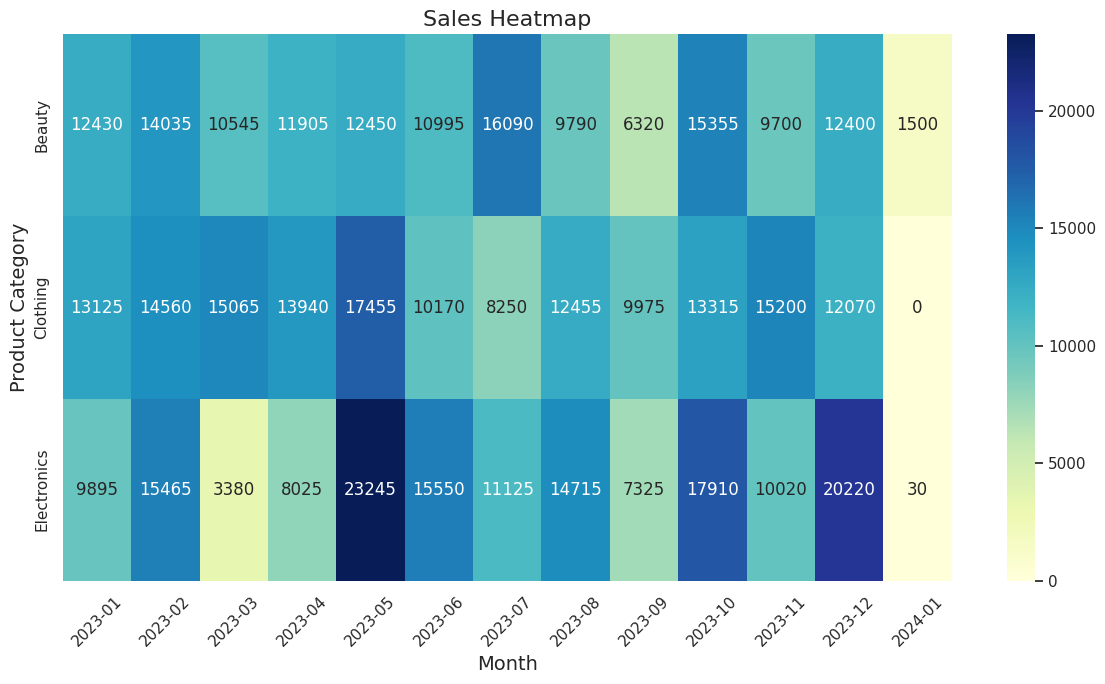

In [15]:
retail['Month'] = retail['Date'].dt.to_period('M')

pivot_table = retail.pivot_table(
    index='Product Category',
    columns='Month',
    values='Total Amount',
    aggfunc='sum',
    fill_value=0
)
# Plot the heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(pivot_table, annot=True, fmt='.0f',cmap='YlGnBu')  # Added color map for better visualization
plt.title('Sales Heatmap', fontsize=16)
plt.ylabel('Product Category', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

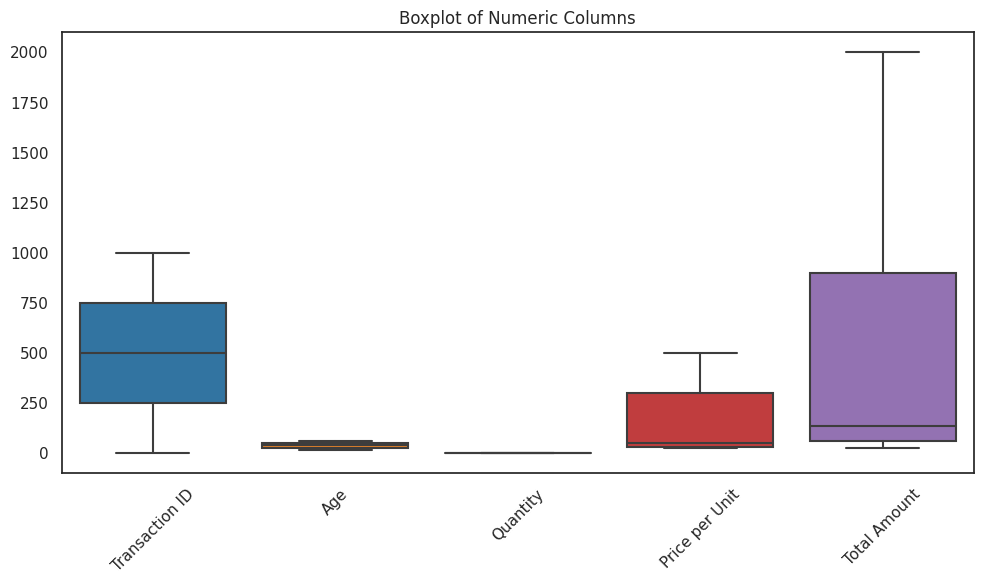

In [16]:
# Create boxplots for all numeric columns in df
plt.figure(figsize=(10, 6))
sns.boxplot(data=retail.select_dtypes(include=['float64', 'int64']))  # Automatically select numeric columns
plt.title('Boxplot of Numeric Columns')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

In [17]:
retail['Product Category'].value_counts()

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

In [18]:
retail['Gender'].value_counts()

Gender
Female    510
Male      490
Name: count, dtype: int64

# **PURCHASING BEHAVIOUR**

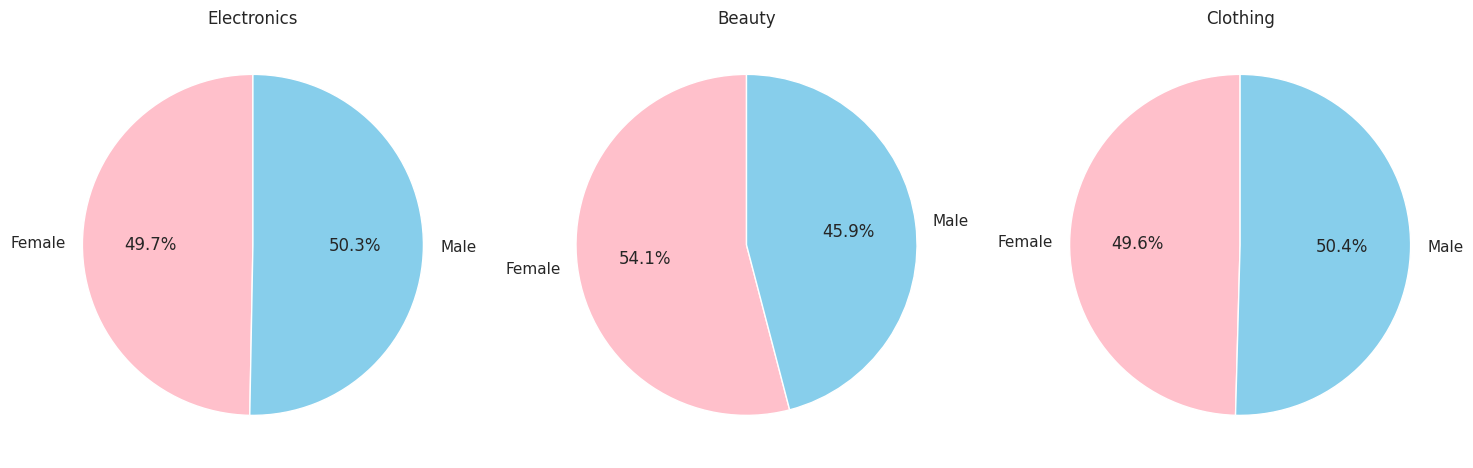

In [19]:
# Filter data for specific product categories
categories = ["Electronics", "Beauty", "Clothing"]
filtered_data = retail[retail['Product Category'].isin(categories)]

# Group by gender and product category and count occurrences
gender_category_counts = filtered_data.groupby(['Gender', 'Product Category']).size().unstack(fill_value=0)

# Plot pie charts for each product category
fig, axs = plt.subplots(1, len(categories), figsize=(15, 5))

for ax, category in zip(axs, categories):
    data = gender_category_counts[category]
    ax.pie(data, labels=data.index, autopct='%1.1f%%', colors=['pink','skyblue'],
           startangle=90)
    ax.set_title(category)

plt.tight_layout()
plt.show()

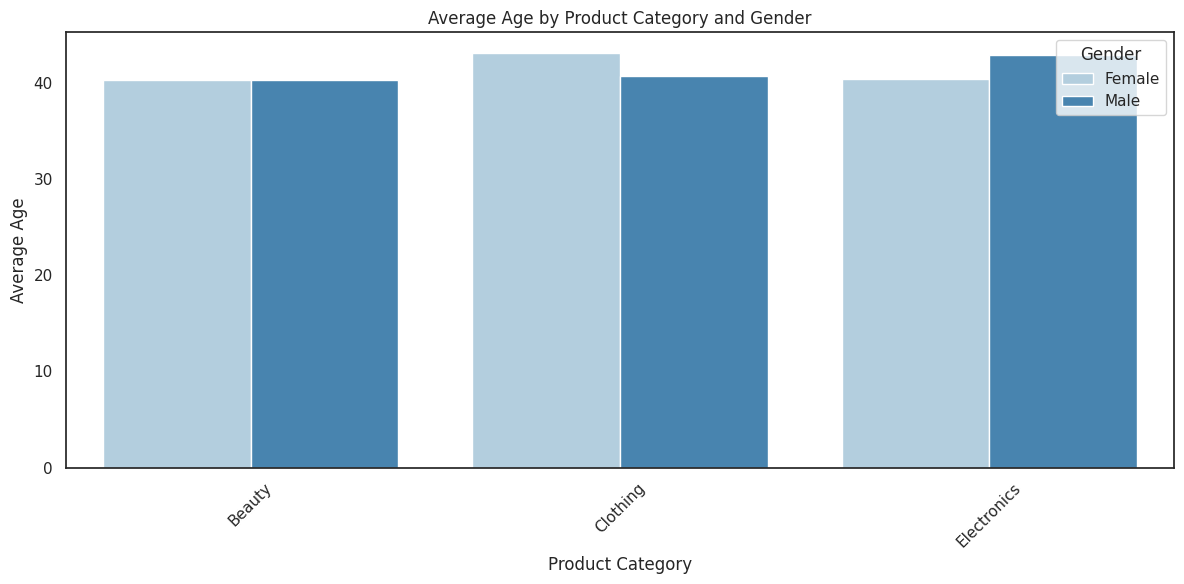

In [20]:
# Calculate average age by product category and gender
age_gender_group = retail.groupby(['Product Category', 'Gender'])['Age'].mean().reset_index()

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Product Category', y='Age', hue='Gender', data=age_gender_group, palette='Blues')

# Customize plot
plt.title('Average Age by Product Category and Gender')
plt.xlabel('Product Category')
plt.ylabel('Average Age')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.legend(title='Gender')

plt.show()

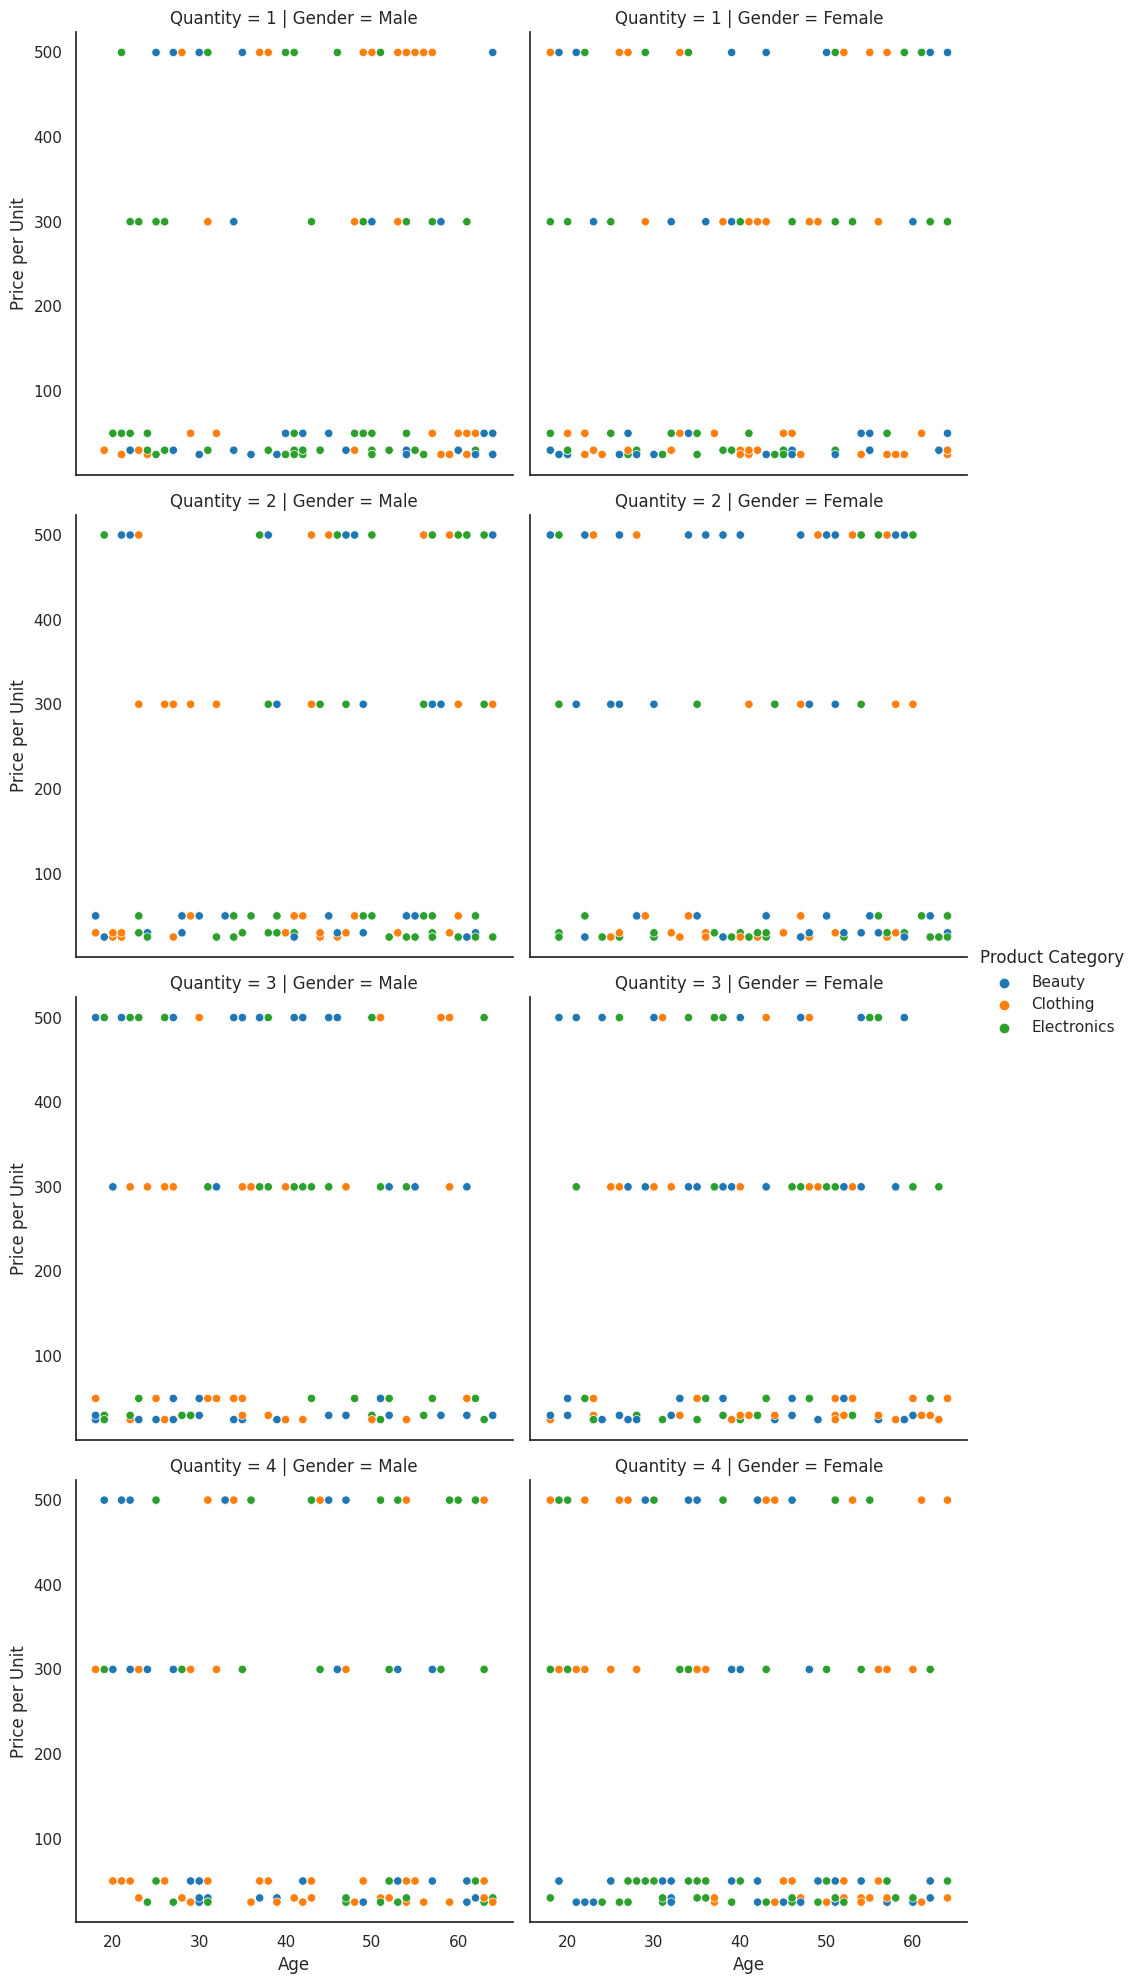

In [21]:
# Create scatter plots with relplot using retail data
sns.relplot(
    data=retail, 
    x='Age', 
    y='Price per Unit', 
    hue='Product Category', 
    row='Quantity', 
    col='Gender', 
    kind='scatter'
)

plt.show()

* Trend Analysis: You can observe how the price per unit varies with age. For instance, if older individuals tend to buy higher-priced items, you will see an upward trend in the scatter plot.
* Clusters: Look for clusters or patterns in the scatter plot that might indicate groups of individuals with similar purchasing behaviors.

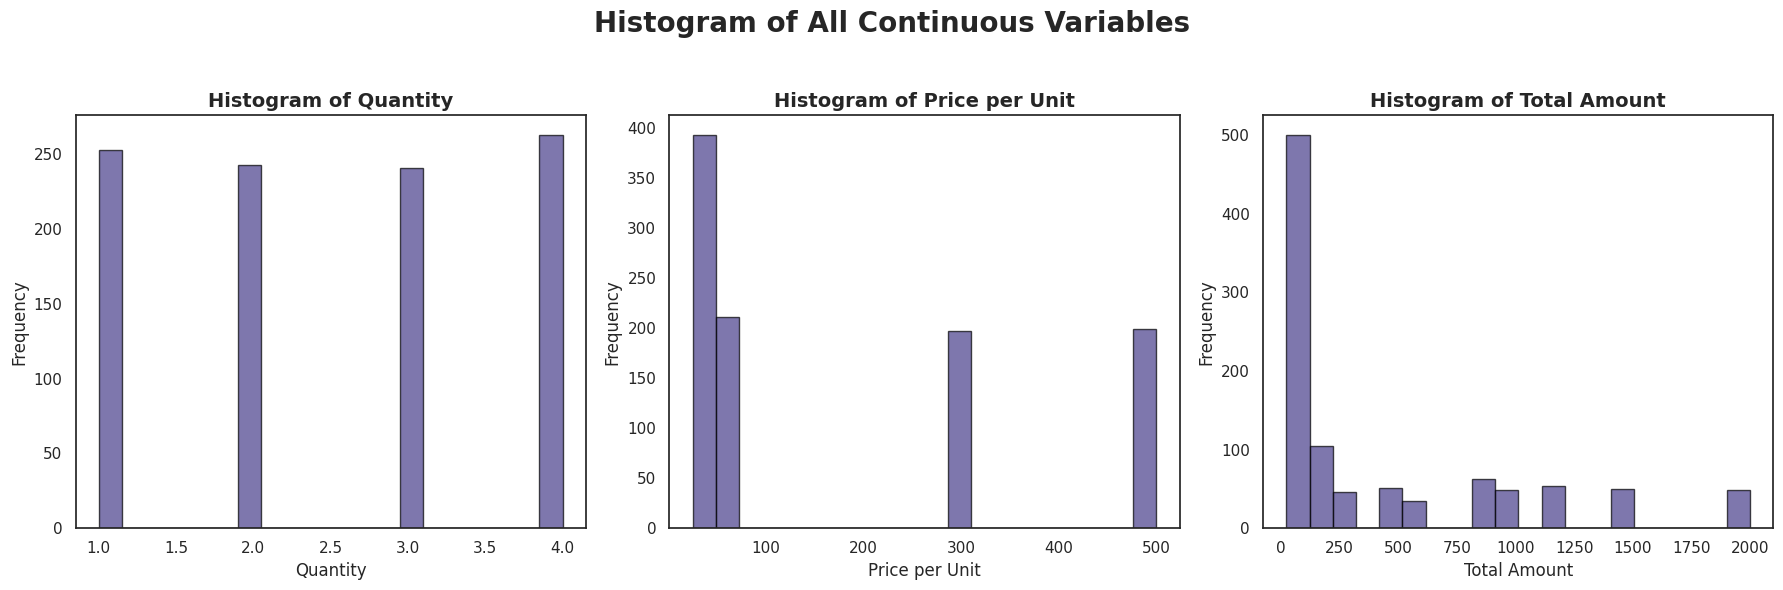

In [22]:
# Create the histogram plot
plt.figure(figsize=(18, 6))

# Define the plot parameters
hist_params = {
    'bins': 20,
    'color': '#483D8B',
    'edgecolor': 'black',
    'alpha': 0.7
}

# Plot the histograms
plt.subplot(131)
plt.hist(retail['Quantity'], **hist_params)
plt.title('Histogram of Quantity', fontsize=14, fontweight='bold')
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(132)
plt.hist(retail['Price per Unit'], **hist_params)
plt.title('Histogram of Price per Unit', fontsize=14, fontweight='bold')
plt.xlabel('Price per Unit', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(133)
plt.hist(retail['Total Amount'], **hist_params)
plt.title('Histogram of Total Amount', fontsize=14, fontweight='bold')
plt.xlabel('Total Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.suptitle('Histogram of All Continuous Variables', fontsize=20, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for suptitle
plt.show()

We can see that products in the range of 0-100 unit price are bought more frequently than other price ranges. Similarly, products which are bought as total price of about 150-200 are most frequently bought.

# Targeted Marketing Recommendations By Age
* Age 29-34: Focus on Clothing

Prioritize clothing in campaigns, leveraging social media to boost sales.
* Age 34-53: Target All Categories

Use broad campaigns for electronics, beauty, and clothing with personalized offers.
* Age 35-44 Females: Focus on Affordable Products

Promote affordable products through tailored ads highlighting value.
* Age 45-54: Emerging Segment

Test campaigns across all product categories to tap into potential growth.

# Recommendations Based on Time Series 
## Sales Peak in May

Recommendation: May, especially May 16th, shows the highest sales with a focus on electronics.

Action: Intensify marketing efforts for electronics around this date. Consider additional promotions or special offers on electronics and clothing during this period to maximize revenue.

## Declining Clothing Sales

Recommendation: Monthly trends show a decline in clothing sales.

Action: Investigate and address the decline with targeted marketing strategies, new product launches, or promotions to reinvigorate interest.

## September Sales Slump

Recommendation: A notable sales slump in September requires attention.

Action: Analyze the causes of the slump and develop strategies to boost sales, such as seasonal promotions or special events.